<a href="https://colab.research.google.com/github/achet24/Machine-Learning-Basics/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 1000
d = 10
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
ads_selected = []
total_reward = 0
for n in range (0, N):
  ad = 0
  max_upper = 0
  for i in range(0,d):
    if (numbers_of_selections[i] >0):
      avg_reward = sums_of_rewards[i]/numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if(upper_bound > max_upper):
      max_upper = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += sums_of_rewards[ad] + reward
  total_reward += reward

<ipython-input-18-861310b9ffcb>:24: RuntimeWarning: overflow encountered in scalar add
  sums_of_rewards[ad] += sums_of_rewards[ad] + reward


## Visualising the results

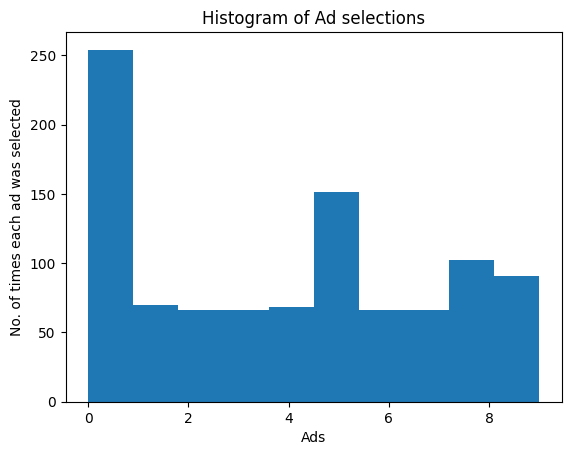

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of Ad selections')
plt.xlabel('Ads')
plt.ylabel('No. of times each ad was selected')
plt.show()